# Prédiction avec un Modèle de Régression Linéaire

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [24]:
sns.set(style="whitegrid")
plt.style.use('ggplot')

In [25]:
np.random.seed(42)
data_size = 300
volume = np.random.rand(data_size) * 1000  # Valeurs de volume entre 0 et 1000
noise = np.random.randn(data_size) * 10      # Bruit aléatoire
prix_cloture = 50 + 0.05 * volume + noise      # Relation linéaire simulée entre le volume et le prix

data = pd.DataFrame({
    'Volume': volume,
    'PrixCloture': prix_cloture
})

In [26]:
data.head()

,Volume,PrixCloture
0,374.540119,69.182724
1,950.714306,91.019712
2,731.993942,108.039138
3,598.658484,86.272114
4,156.018640,37.549506


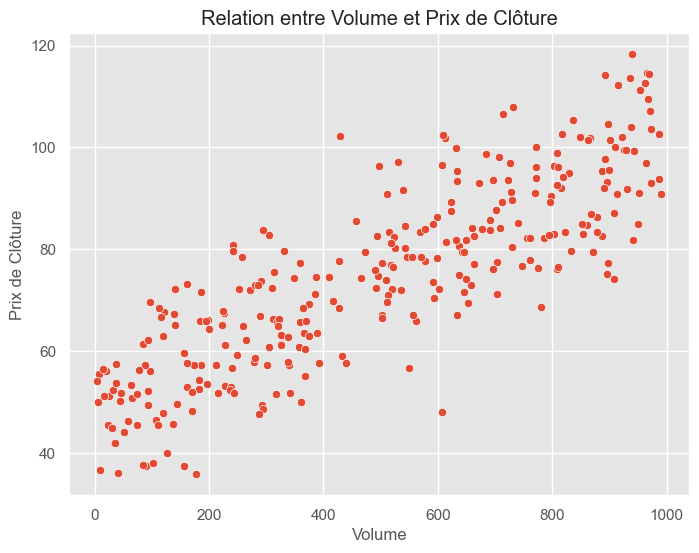

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Volume', y='PrixCloture', data=data)
plt.title("Relation entre Volume et Prix de Clôture")
plt.xlabel("Volume")
plt.ylabel("Prix de Clôture")
plt.show()

In [29]:
# Division des données : 80% pour l'entraînement, 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Le modèle a été entraîné avec succès.")

Le modèle a été entraîné avec succès.


In [31]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) : {mse:.2f}")
print(f"Coefficient de Détermination (R²) : {r2:.2f}")

Mean Squared Error (MSE) : 66.75
Coefficient de Détermination (R²) : 0.79


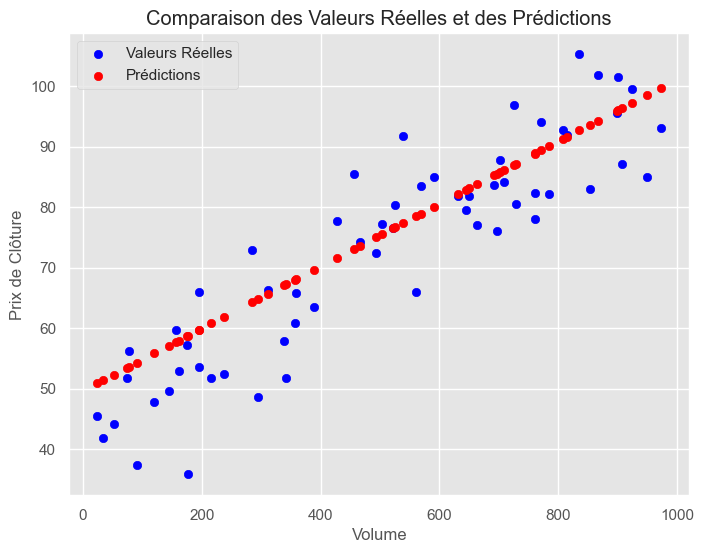

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Valeurs Réelles')
plt.scatter(X_test, y_pred, color='red', label='Prédictions')
plt.xlabel("Volume")
plt.ylabel("Prix de Clôture")
plt.title("Comparaison des Valeurs Réelles et des Prédictions")
plt.legend()
plt.show()

In [33]:
with open("modele_regression.pkl", "wb") as f:
    pickle.dump(model, f)

print("Le modèle a été sauvegardé sous 'modele_regression.pkl'.")

Le modèle a été sauvegardé sous 'modele_regression.pkl'.
